<a href="https://colab.research.google.com/github/Abdullah-bin-hilabi/Opencv-projects/blob/main/image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loads the Fashion-MNIST dataset.

# This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

# The classes are:

# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


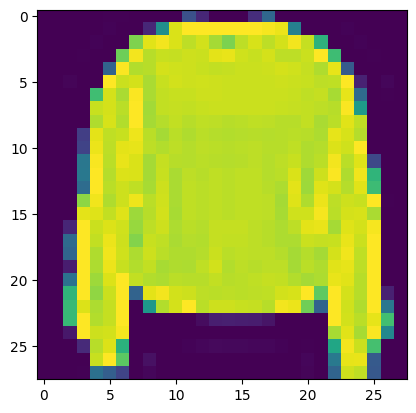

In [4]:
plt.imshow(x_train_full[7])

In [5]:
y_train_full[7]

np.uint8(2)

In [6]:
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
class_name[y_train_full[110]]

'Bag'

In [8]:
x_train_full[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  0,   0,   0,   0, 177, 239, 223, 254, 223, 232, 234, 234, 236,
        236, 235, 235, 235, 235, 235, 234, 231, 233, 222, 246,  88,   0,
          1,   0],
       [  0,   0,   0,   0, 234, 239, 229, 255, 220, 232, 233, 232, 234,
        235, 235, 235, 235, 235, 234, 233, 232, 230, 228, 254, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 225, 240, 226, 255, 221, 227, 232, 228, 231,
        230, 228, 229, 231, 230, 228, 228, 232, 223, 229, 244, 231,   0,
          0,   0],
       [  0,   0,   0,  47, 245, 231, 234, 249, 229, 221, 229, 225, 229,
        227, 226, 227, 228, 227, 228, 229, 228, 224, 246, 240, 227,   0,
          0,   0],
       [  0,   0,   0,  51, 248, 230, 245, 246, 230, 226, 230, 227, 230,
        229, 228, 229, 230, 228, 228, 231, 225, 227, 242, 237, 255,   0,
          0,   0],
       [  0,   0,   0, 101, 253, 229, 247, 241, 221, 233, 228, 227, 229,
        228, 227, 228, 230, 227, 230, 234, 225, 229, 251, 229, 243,  55,
          0,   0],
       [  0,   0,   0, 102, 255, 227, 242, 241, 221, 234, 223, 230, 228,
        231, 229, 231, 231, 227, 229, 241, 219, 236, 254, 225, 250, 167,
          0,   0],
       [  0,   0,   0,  90, 255, 229, 236, 231, 222, 236, 223, 231, 229,
        231, 229, 231, 231, 228, 224, 245, 218, 243, 239, 227, 244, 175,
          0,   0],
       [  0,   0,   0, 212, 250, 225, 236, 249, 229, 237, 223, 231, 229,
        231, 229, 231, 231, 230, 221, 243, 225, 248, 230, 236, 234, 255,
          1,   0],
       [  0,   0,   0, 245, 243, 232, 243, 218, 228, 238, 222, 231, 229,
        231, 229, 231, 231, 230, 222, 237, 237, 252, 229, 239, 240, 223,
          0,   0],
       [  0,   0,  27, 255, 235, 242, 237, 216, 230, 236, 224, 229, 227,
        233, 233, 233, 230, 228, 224, 230, 245, 247, 221, 243, 239, 252,
          0,   0],
       [  0,   0,  88, 255, 232, 248, 236, 208, 234, 231, 223, 227, 226,
        233, 232, 232, 230, 228, 224, 224, 235, 233, 234, 247, 235, 255,
          0,   0],
       [  0,   0,  83, 255, 225, 250, 237, 224, 236, 229, 225, 225, 227,
        235, 229, 231, 230, 230, 227, 221, 227, 221, 239, 250, 231, 255,
          0,   0],
       [  0,   0,  20, 255, 224, 248, 234, 226, 232, 222, 225, 224, 231,
        238, 226, 230, 228, 230, 230, 221, 229, 225, 244, 246, 230, 255,
          0,   0],
       [  0,   0,  95, 255, 218, 242, 255, 232, 226, 224, 229, 228, 228,
        232, 228, 229, 231, 233, 232, 226, 221, 224, 247, 244, 228, 255,
          0,   0],
       [  0,   0, 167, 255, 213, 235, 255,  81, 245, 251, 238, 236, 230,
        229, 230, 229, 230, 231, 238, 240, 255, 192, 255, 239, 228, 255,
         23,   0],
       [  0,   0, 173, 242, 224, 233, 255,   0, 136, 226, 239, 255, 229,
        236, 236, 234, 233, 228, 251, 248, 200,  81, 255, 237, 225, 255,
        101,   0],
       [  0,   0, 172, 255, 226, 233, 255,   0,   0,   0,   0,   0,   8,
         21,  22,  21,  20,  14,   0,   0,   0,   0, 255, 238, 229, 246,
        178,   0],
       [  0,   0,  16, 255, 236, 238, 25

In [9]:
#we need to do normallze the data we will amke this 0 and 1

In [10]:
x_train_n = x_train_full/255
x_test_n = x_test/255

In [11]:
#split data into train/validation/test datasets

In [12]:
x_valid, x_train = x_train_n[:5000], x_train_n[:5000]
y_valid, y_train = y_train_full[:5000], y_train_full[:5000]
X_test = x_train_n

In [13]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

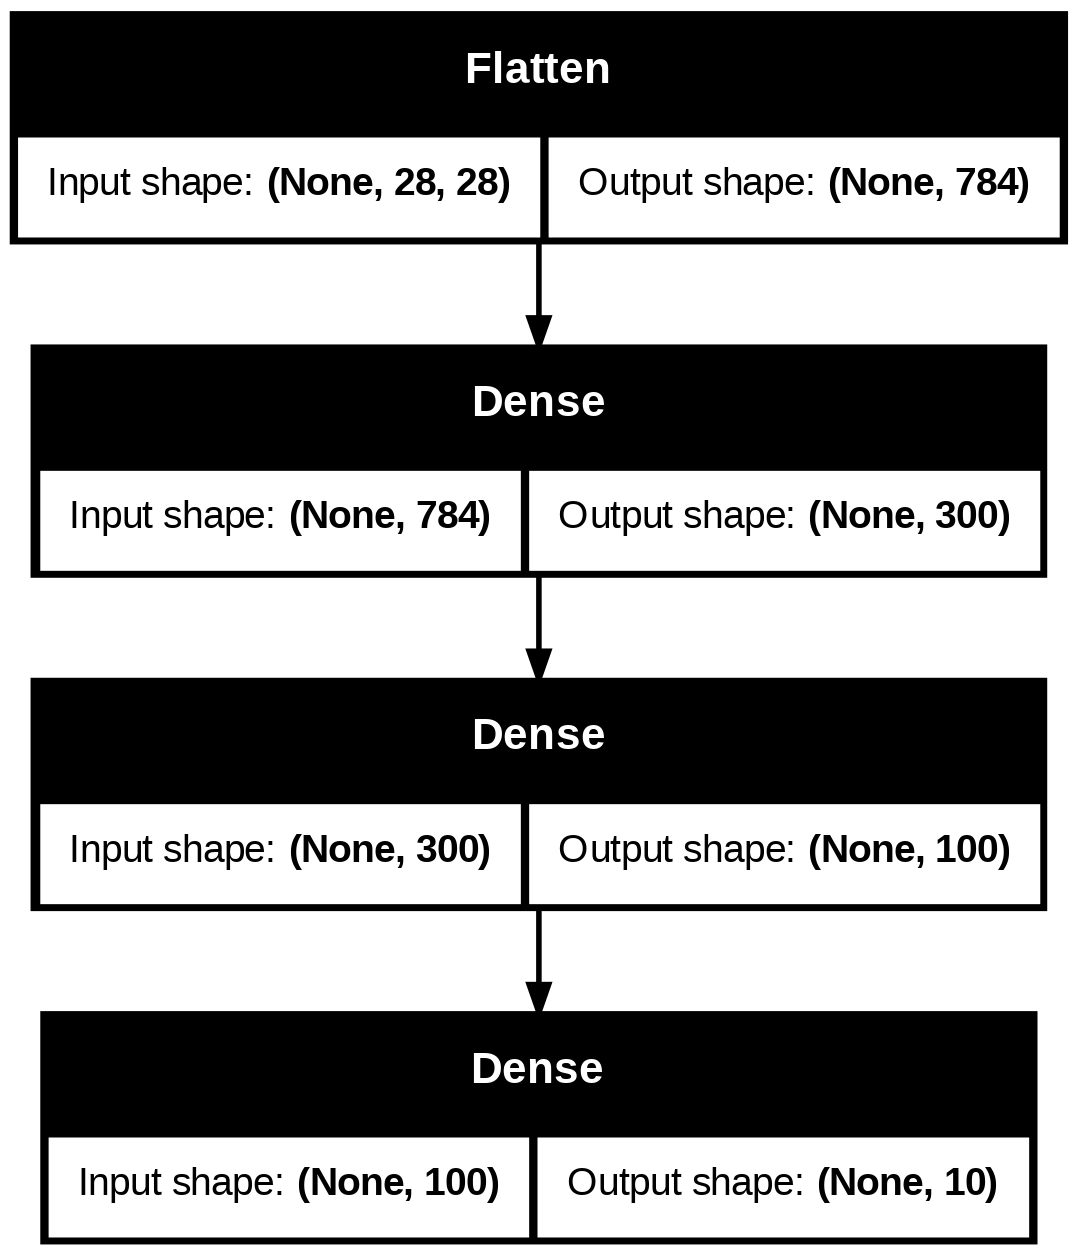

In [17]:
import pydot
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [20]:
weights , baises = model.layers[1].get_weights()

In [21]:
weights

array([[-0.03816301, -0.02655442,  0.04209067, ..., -0.01101185,
         0.00849663,  0.06614104],
       [-0.05471908,  0.02831281, -0.00737691, ..., -0.04066761,
         0.02104431,  0.03400728],
       [-0.02883937, -0.07416379,  0.01256596, ...,  0.00397569,
        -0.04281835,  0.00793236],
       ...,
       [ 0.00449464,  0.00089065,  0.00260308, ...,  0.04189879,
         0.00108873, -0.06358237],
       [-0.02700837, -0.04873411,  0.03337484, ..., -0.03079228,
        -0.02558914,  0.05099094],
       [ 0.04616477, -0.03298865, -0.00519627, ...,  0.03674024,
        -0.03125857,  0.03099722]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
baises

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
baises.shape

(300,)

In [35]:
model.compile(
    loss="sparse_categorical_crossentropy",  # What the model tries to minimize
    optimizer="sgd",                         # How the model improves during training
    metrics=["accuracy"]                     # What to track during training/testing
)

In [37]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8877 - loss: 0.3299 - val_accuracy: 0.8614 - val_loss: 0.3958
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8955 - loss: 0.3191 - val_accuracy: 0.8866 - val_loss: 0.3334
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8894 - loss: 0.3332 - val_accuracy: 0.8912 - val_loss: 0.3366
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8952 - loss: 0.3274 - val_accuracy: 0.8972 - val_loss: 0.3104
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8986 - loss: 0.3140 - val_accuracy: 0.8934 - val_loss: 0.3117
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8967 - loss: 0.3109 - val_accuracy: 0.8130 - val_loss: 0.4731
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8939 - loss: 0.3205 - val_accuracy: 0.9072 - val_loss: 0.2872
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8986 - loss: 0.2984 - val_accuracy: 0

In [30]:
model_history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 157}

In [31]:
model_history.history

{'accuracy': [0.5623999834060669,
  0.6995999813079834,
  0.7480000257492065,
  0.7749999761581421,
  0.8004000186920166,
  0.8108000159263611,
  0.8176000118255615,
  0.828000009059906,
  0.8396000266075134,
  0.8429999947547913,
  0.8446000218391418,
  0.8432000279426575,
  0.8533999919891357,
  0.853600025177002,
  0.8601999878883362,
  0.8600000143051147,
  0.8579999804496765,
  0.8641999959945679,
  0.8682000041007996,
  0.868399977684021,
  0.8715999722480774,
  0.8751999735832214,
  0.875,
  0.8759999871253967,
  0.8736000061035156,
  0.8795999884605408,
  0.8840000033378601,
  0.8840000033378601,
  0.8862000107765198,
  0.8830000162124634],
 'loss': [1.4944194555282593,
  0.8810053467750549,
  0.7398820519447327,
  0.6628197431564331,
  0.6121622920036316,
  0.5772460699081421,
  0.546427309513092,
  0.5235903263092041,
  0.5073671340942383,
  0.4900687038898468,
  0.47612500190734863,
  0.4713532626628876,
  0.45306915044784546,
  0.4419853389263153,
  0.4332737922668457,
  0.

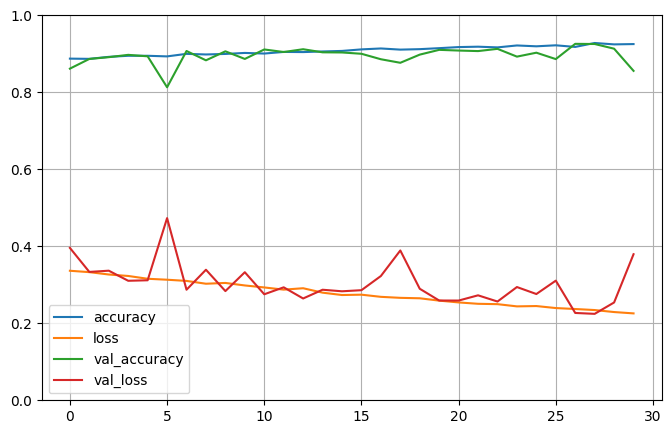

In [38]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7705 - loss: 132.9675


[135.2493133544922, 0.766700029373169]

In [41]:
x_new = x_test[:3] #using first 3 as a sample

In [45]:
y_pred = model.predict(x_new) #predicting the probability
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
y_pred_class = np.argmax(y_pred, axis=1)
np.array(class_name)[y_pred_class]

array(['Ankle boot', 'Shirt', 'Trouser'], dtype='<U11')

AxesImage(shape=(28, 28))


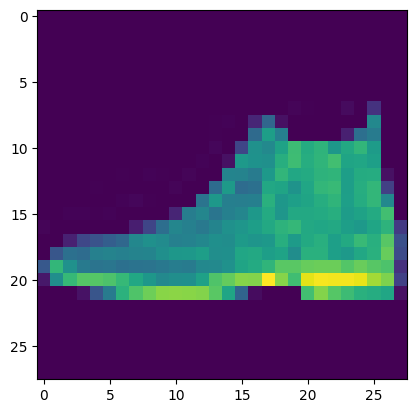

In [50]:
print(plt.imshow(x_new[0]))

AxesImage(shape=(28, 28))


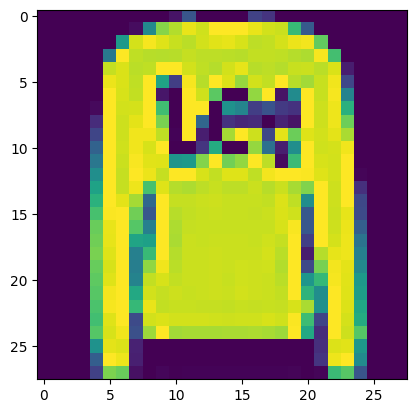

In [51]:
print(plt.imshow(x_new[1]))

AxesImage(shape=(28, 28))


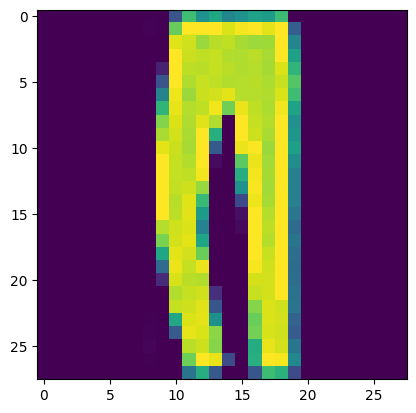

In [52]:
print(plt.imshow(x_new[2]))